# Proyek Analisis Data: Bike Sharing
- **Nama:** Leonard Bodhi Kumaro
- **Email:** bkleonard174@gmail.com
- **ID Dicoding:** leonardkumaro

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda tiap bulannya?
- Pada hari apa terjadi penyewaan sepeda paling banyak dan paling sedikit?
- Pada musim apa terjadi penyewaan sepeda paling banyak dan paling sedikit?
- Pada cuaca apa terjadi penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Melihat dataset day.csv pada folder data
day_df = pd.read_csv("data/day.csv")
# Melihat 5 data teratas
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Melihat dataset hour.csv pada folder data
hour_df = pd.read_csv("data/hour.csv")
# Melihat 5 data teratas
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jika diperhatikan, dataset day.csv merupakan data harian penyewaan sepeda sedangkan dataset hour.csv merupakan data tiap jam penyewaan sepeda. Kedua nya memiliki kolom yang sama, kecuali kolom hr yang tidak tersedia pada day.csv

### Assessing Data

#### Menilai tabel day_df

In [4]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada day_df telah lengkap. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harus direpresentasikan sebagai tipe data datetime. Kemudian untuk kolom season, mnth, holiday, weekday, workingday, weathersit akan diubah menjadi tipe data kategori. Kita akan ubah pada tahap data cleaning nanti.

In [5]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang duplikat pada day.csv

In [6]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam kolom day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [7]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada hour_df telah lengkap. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harus direpresentasikan sebagai tipe data datetime. Kemudian untuk kolom season, mnth, hr, holiday, weekday, workingday, weathersit akan diubah menjadi tipe data kategori. Kita akan ubah pada tahap data cleaning nanti.

In [8]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam kolom hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data day_df dan hour_df telah lengkap, dalam artian tidak terdapat missing values. Tidak terdapat duplikasi data.

### Cleaning Data

#### Membersihkan tabel day_df

In [10]:
# Memeriksa tipe data pada tiap kolom day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
# Mengganti tipe data pada kolom dteday menjadi datetime.
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
# Memeriksa kembali tipe data 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
# Mengganti tipe data pada kolom season, mnth, holiday, weekday, workingday, dan weathersit menjadi tipe data kategori.
category_columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in category_columns:
    day_df[column] = day_df[column].astype("category")

In [14]:
# Memeriksa kembali tipe data 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [15]:
# Mengonversi nilai dari kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit menjadi kategori yang sesuai pada file readme.
day_df["season"] = day_df["season"].map({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
day_df["yr"] = day_df["yr"].map({0: 2011, 1: 2012})
day_df["mnth"] = day_df["mnth"].map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
day_df["weekday"] = day_df["weekday"].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
day_df["workingday"] = day_df["workingday"].map({0: "Weekend", 1: "Weekday"})
day_df["weathersit"] = day_df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"})
day_df["holiday"] = day_df["holiday"].map({0: "No", 1: "Yes"})

In [16]:
# Menghapus kolom "instant" karena tidak diperlukan
day_df = day_df.drop(columns=["instant"])

In [17]:
# Memeriksa kembali data
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,No,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,Weekend,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Weekday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Weekday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Weekday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Merubah nilai pada kolom temp, atemp, hum, dan windspeed menjadi nilai yang sesuai dengan file readme.
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

In [19]:
# Memeriksa kembali data
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,No,Saturday,Weekend,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,Weekend,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Weekday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Weekday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Weekday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Membersihkan tabel hour_df

In [20]:
# Memeriksa tipe data pada tiap kolom day_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
# Mengganti tipe data pada kolom dteday menjadi datetime.
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [22]:
# Memeriksa kembali tipe data 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [23]:
# Mengganti tipe data pada kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit menjadi tipe data kategori.
category_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

for column in category_columns:
    hour_df[column] = hour_df[column].astype("category")

In [24]:
# Memeriksa kembali tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [25]:
# Mengonversi nilai dari kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit menjadi kategori yang sesuai pada file readme.
hour_df["season"] = hour_df["season"].map({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
hour_df["yr"] = hour_df["yr"].map({0: 2011, 1: 2012})
hour_df["mnth"] = hour_df["mnth"].map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
hour_df["hr"] = hour_df["hr"].map({0: "12AM", 1: "1AM", 2: "2AM", 3: "3AM", 4: "4AM", 5: "5AM", 6: "6AM", 7: "7AM", 8: "8AM", 9: "9AM", 10: "10AM", 11: "11AM", 12: "12PM", 13: "1PM", 14: "2PM", 15: "3PM", 16: "4PM", 17: "5PM", 18: "6PM", 19: "7PM", 20: "8PM", 21: "9PM", 22: "10PM", 23: "11PM"})
hour_df["weekday"] = hour_df["weekday"].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
hour_df["workingday"] = hour_df["workingday"].map({0: "Weekend", 1: "Weekday"})
hour_df["weathersit"] = hour_df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"})
hour_df["holiday"] = hour_df["holiday"].map({0: "No", 1: "Yes"})

In [26]:
# Menghapus kolom "instant" karena tidak diperlukan
hour_df = hour_df.drop(columns=["instant"])

In [27]:
# Merubah nilai pada kolom temp, atemp, hum, dan windspeed menjadi nilai yang sesuai dengan file readme.
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [28]:
# Memeriksa kembali data
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,12AM,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Springer,2011,January,1AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Springer,2011,January,2AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Springer,2011,January,3AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Springer,2011,January,4AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_df

In [29]:
# Menampilkan contoh 5 baris dari tabel customers_df.
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,No,Saturday,Weekend,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,Weekend,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Weekday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Weekday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Weekday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
# Menampilkan rangkuman parameter statistik dari data customers_df.
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,January,No,Sunday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [31]:
# Melihat demografi jumlah penyewa sepeda berdasarkan season.
day_df.groupby(by="season", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
season,,,
Springer,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


In [32]:
# Melihat demografi jumlah penyewa sepeda berdasarkan bulan.
day_df.groupby(by="mnth", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
mnth,,,
January,12042,122891,134933
February,14963,136389,151352
March,44444,184476,228920
April,60802,208292,269094
May,75285,256401,331686
June,73906,272436,346342
July,78157,266791,344948
August,72039,279155,351194
September,70323,275668,345991


In [33]:
# Melihat demografi jumlah penyewa sepeda berdasarkan hari kerja.
day_df.groupby(by="workingday", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
workingday,,,
Weekend,316732,683537,1000269
Weekday,303285,1989125,2292410


In [34]:
# Melihat demografi jumlah penyewa sepeda berdasarkan cuaca.
day_df.groupby(by="weathersit", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
weathersit,,,
Clear,446346,1811606,2257952
Mist,169776,827082,996858
Light Snow,3895,33974,37869


In [35]:
# Melihat demografi jumlah penyewa sepeda berdasarkan hari.
day_df.groupby(by="weekday", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


### Explore hour_df

In [36]:
# Menampilkan contoh 5 baris dari tabel hour_df.
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,12AM,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Springer,2011,January,1AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Springer,2011,January,2AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Springer,2011,January,3AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Springer,2011,January,4AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,0,1,1


In [37]:
# Menampilkan rangkuman parameter statistik dari data hour_df.
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.0,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,24,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012.0,July,4PM,No,Saturday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,730,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [38]:
# Melihat demografi jumlah penyewa sepeda berdasarkan season.
hour_df.groupby(by="season", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
season,,,
Springer,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


In [39]:
# Melihat demografi jumlah penyewa sepeda berdasarkan jam.
hour_df.groupby(by="hr", observed=True)[["casual", "registered", "cnt"]].sum()

,casual,registered,cnt
hr,,,
12AM,7375,31755,39130
1AM,4709,19455,24164
2AM,3412,12940,16352
3AM,1893,6281,8174
4AM,874,3554,4428
5AM,1012,13249,14261
6AM,3017,52115,55132
7AM,8037,146134,154171
8AM,15761,245240,261001


#### Menghubungkan semua data

Melakukan concat untuk menggabungkan kedua dataframe secara vertikal karena data harian dan data tiap jam tidak berbeda secara fungsi.

In [40]:
# Menggabungkan data day_df dan hour_df
all_df = pd.concat([hour_df, day_df])

In [41]:
# Menampilkan data yang telah digabungkan
all_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,12AM,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Springer,2011,January,1AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Springer,2011,January,2AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Springer,2011,January,3AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Springer,2011,January,4AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,0,1,1


In [42]:
# Menampilkan rangkuman parameter statistik dari data all_df.
all_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,18110,18110,18110.000000,18110,17379,18110,18110,18110,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
unique,NaN,4,NaN,12,24,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,July,4PM,No,Saturday,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4684,NaN,1550,730,17589,2617,12365,11876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 03:00:25.046935296,NaN,2011.502485,NaN,NaN,NaN,NaN,NaN,NaN,20.373822,23.785887,62.725569,12.737591,68.472336,295.158697,363.631033
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,37.000000,43.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.659683,18.000000,123.000000,152.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,55.000000,238.000000,305.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,3410.000000,6946.000000,8714.000000


##### Explore Musim

In [43]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan musim.
all_df.groupby(by="season", observed=True)["cnt"].sum().sort_values(ascending=False)

season
Fall        2122258
Summer      1837178
Winter      1683226
Springer     942696
Name: cnt, dtype: int64

Jika diperhatikan, musim gugur(fall) adalah musim tertinggi penyewaan sepeda terjadi.

##### Explore Bulanan

In [44]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan bulan.
all_df.groupby(by="mnth", observed=True)["cnt"].sum().sort_values(ascending=False)

mnth
August       702388
June         692684
September    691982
July         689896
May          663372
October      644704
April        538188
November     509662
March        457840
December     422072
February     302704
January      269866
Name: cnt, dtype: int64

Jika diperhatikan, bulan Agustus adalah bulan tertinggi penyewaan sepeda terjadi.

##### Explore Jam

In [45]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan jam.
all_df.groupby(by="hr", observed=True)["cnt"].sum().sort_values(ascending=False)

hr
5PM     336860
6PM     309772
8AM     261001
4PM     227748
7PM     226789
1PM     184919
12PM    184414
3PM     183149
2PM     175652
8PM     164550
9AM     159438
7AM     154171
11AM    151320
10AM    126257
9PM     125445
10PM     95612
11PM     63941
6AM      55132
12AM     39130
1AM      24164
2AM      16352
5AM      14261
3AM       8174
4AM       4428
Name: cnt, dtype: int64

Jika diperhatikan, sekitar Jam 5 sore merupakan jumlah penyewaan sepeda tertinggi.

##### Explore Hari Libur/Kerja

In [46]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan hari kerja.
all_df.groupby(by="workingday", observed=True)["cnt"].sum().sort_values(ascending=False)

workingday
Weekday    4584820
Weekend    2000538
Name: cnt, dtype: int64

Jika diperhatikan, pada hari kerja terjadi penyewaan sepeda tertinggi.

##### Explore Cuaca

In [47]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan cuaca.
all_df.groupby(by="weathersit", observed=True)["cnt"].sum().sort_values(ascending=False)

weathersit
Clear         4596125
Mist          1792810
Light Snow     196200
Heavy Rain        223
Name: cnt, dtype: int64

Jika diperhatikan dari hasil analisis di atas, cuaca yang cerah merupakan cuaca yang paling banyak diminati oleh pengguna sepeda. Selain itu, musim panas merupakan musim yang paling banyak diminati oleh pengguna sepeda. Hal ini dapat dijadikan sebagai bahan pertimbangan untuk meningkatkan jumlah sepeda yang disewakan pada musim panas dan cuaca yang cerah.

##### Explore Hari

In [48]:
# Membuat pivot table untuk memperoleh informasi terkait jumlah sewa berdasarkan hari.
all_df.groupby(by="weekday", observed=True)["cnt"].sum().sort_values(ascending=False)

weekday
Friday       975580
Thursday     970790
Saturday     955614
Wednesday    946096
Tuesday      938218
Monday       911006
Sunday       888054
Name: cnt, dtype: int64

Jika diperhatikan tidak ada perbedaan yang signifikan antara jumlah sewa sepeda pada hari senin sampai hari minggu. Hal ini dapat diartikan bahwa orang-orang yang menyewa sepeda beragam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda tiap bulannya?

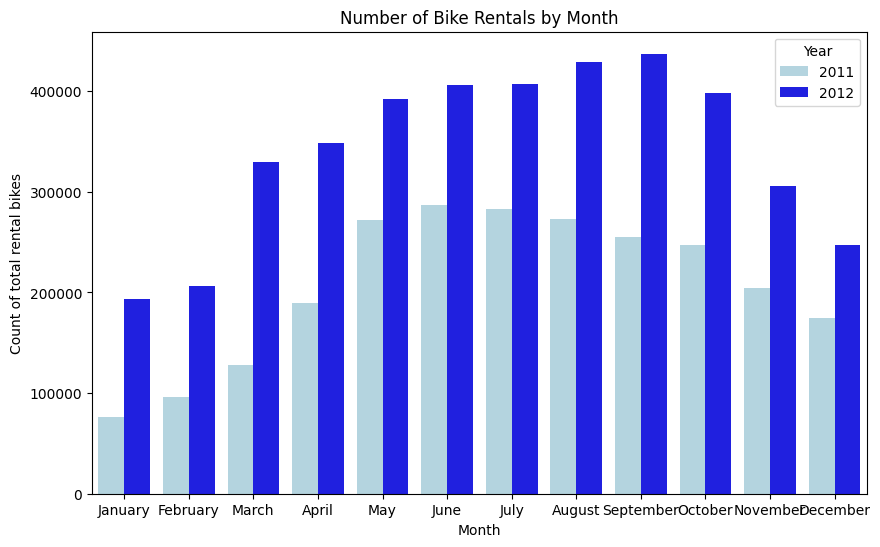

In [49]:
# Menampilkan line chart terkait jumlah penyewa sepeda berdasarkan bulan
plt.figure(figsize=(10, 6))
sns.barplot(data=all_df, x="mnth", y="cnt", hue='yr', errorbar=None, palette=['lightblue', 'blue'], estimator=sum)
plt.legend(title='Year')
plt.title("Number of Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Count of total rental bikes")

plt.show()

Jika diperhatikan dari grafik di atas, terlihat bahwa jumlah penyewa sepeda cenderung meningkat pada bulan Maret hingga bulan September. Sedangkan jumlah penyewa sepeda cenderung menurun pada bulan Oktober hingga bulan Januari.

### Pertanyaan 2: Pada hari apa terjadi penyewaan sepeda paling banyak dan paling sedikit?

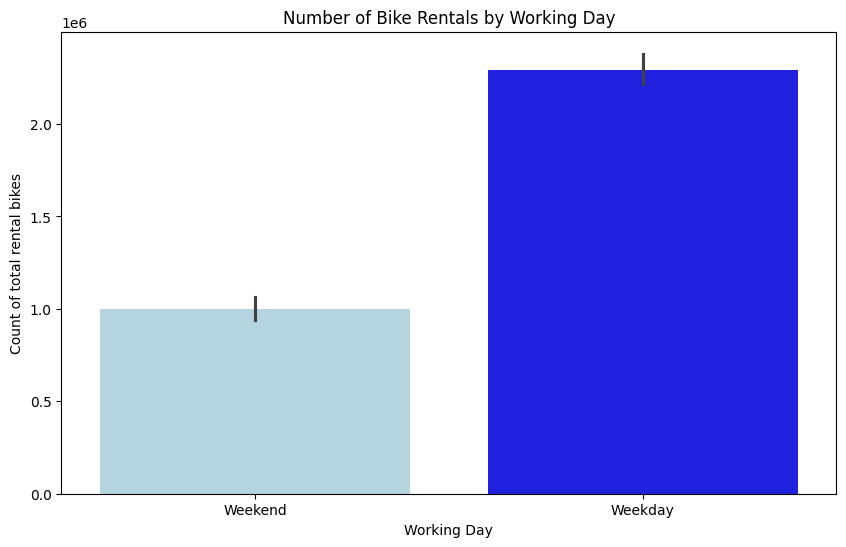

In [50]:
# Menampilkan bar chart terkait jumlah penyewa sepeda berdasarkan hari kerja
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x="workingday", y="cnt", hue="workingday", estimator=sum, palette=['lightblue', 'blue'], legend=False)
plt.title("Number of Bike Rentals by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Count of total rental bikes")

plt.show()

Jika diperhatikan, terdapat perbedaan jumlah penyewa sepeda antara hari kerja dan hari libur. Pada hari kerja, jumlah penyewa sepeda lebih banyak dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh kebutuhan masyarakat untuk bersepeda menuju tempat kerja.

Hal ini dapat dibuktikan dengan melihat jam sewa sepeda yang paling tinggi pada hari kerja.

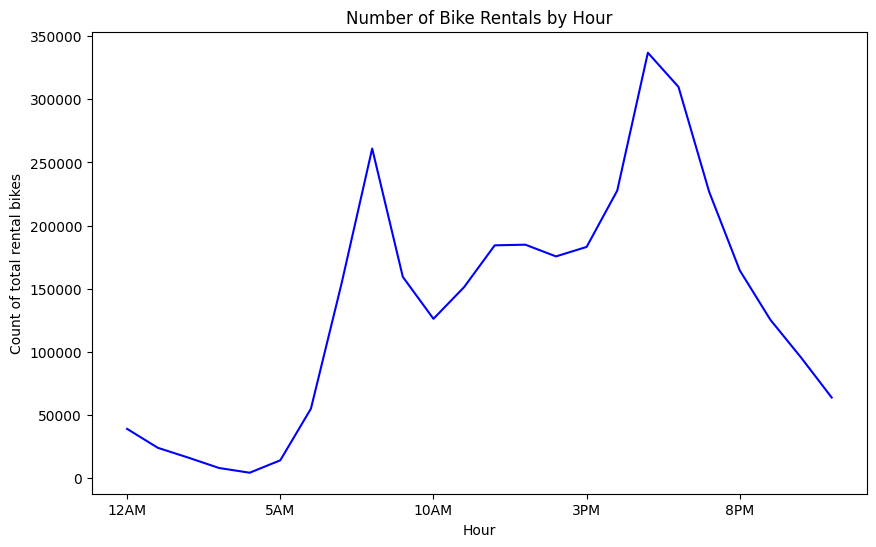

In [51]:
# Menampilkan bar chart terkait jumlah penyewa sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", estimator=sum, errorbar=None, color='blue')
plt.xticks(np.arange(0, 24, 5))
plt.title("Number of Bike Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of total rental bikes")
plt.show()

Jika diperhatikan, penyewaan sepeda paling banyak pada jam berangkat dan pulang kerja. Hal ini menunjukkan bahwa sepeda digunakan sebagai sarana transportasi untuk bekerja.

### Pertanyaan 3 : Pada musim apa terjadi penyewaan sepeda paling banyak dan paling sedikit?

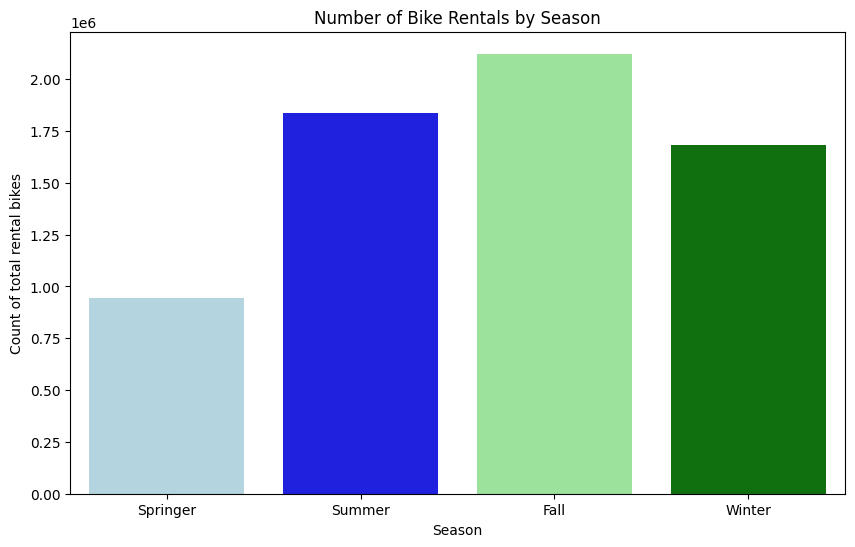

In [62]:
# Menampilkan bar chart terkait jumlah penyewa sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=all_df, x="season", y="cnt", hue="season" , errorbar=None,  estimator=sum, palette=['lightblue', 'blue', 'lightgreen', 'green'], legend=False)
plt.title("Number of Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Count of total rental bikes")
plt.show()

Jika diperhatikan, musim gugur memiliki jumlah penyewa sepeda yang paling banyak, sedangkan musim semi memiliki jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 4: Pada cuaca apa terjadi penyewaan sepeda paling banyak dan paling sedikit?

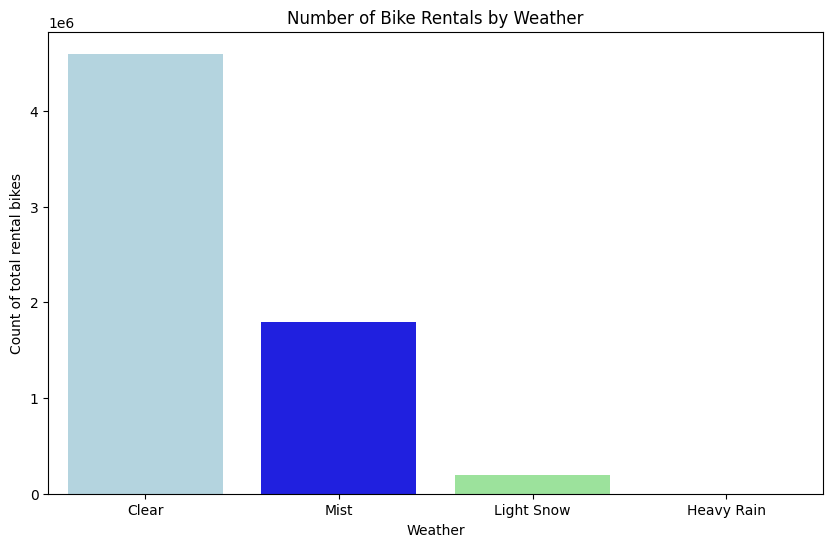

In [64]:
# Menampilkan bar chart terkait jumlah penyewa sepeda berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=all_df, x="weathersit", y="cnt", hue="weathersit", errorbar=None,  estimator=sum, palette=['lightblue', 'blue', 'lightgreen', 'green'], legend=False)
plt.title("Number of Bike Rentals by Weather")
plt.xlabel("Weather")
plt.ylabel("Count of total rental bikes")
plt.show()

### Pertanyaan 5: Bagaimana hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah penyewaan sepeda?

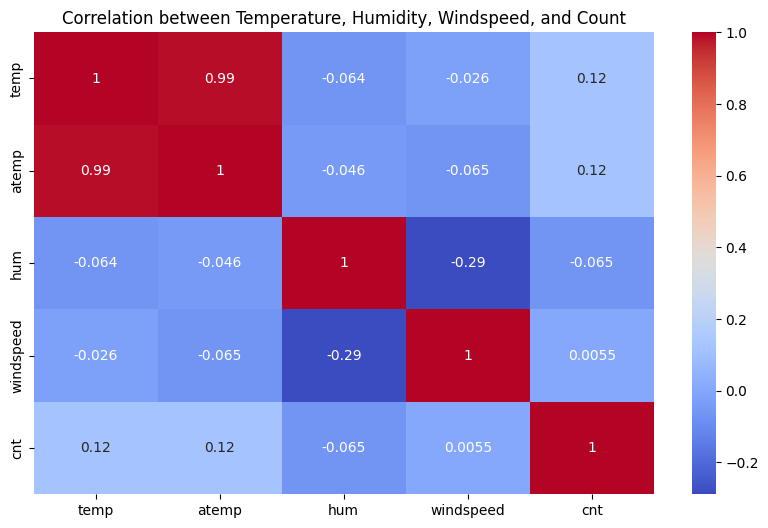

In [54]:
# Membuat korelasi antara variabel suhu, kelembaban, kecepatan angin, dan jumlah penyewa sepeda
plt.figure(figsize=(10, 6))
sns.heatmap(all_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Temperature, Humidity, Windspeed, and Count")
plt.show()

Temp & atemp (0.99) → Korelasi sangat tinggi (hampir 1), artinya suhu aktual dan suhu yang dirasakan sangat berkaitan.
Temp & cnt (0.12), atemp & cnt (0.12) → Korelasi positif tetapi lemah, artinya semakin tinggi suhu, jumlah penyewaan sepeda sedikit meningkat.
Hum & cnt (-0.065) → Korelasi negatif sangat lemah, artinya kelembaban tidak terlalu memengaruhi jumlah penyewaan sepeda.
Windspeed & cnt (0.0055) → Hampir tidak ada hubungan antara kecepatan angin dan jumlah penyewaan sepeda.
Hum & windspeed (-0.29) → Korelasi negatif cukup lemah, artinya saat kelembaban tinggi, kecepatan angin cenderung lebih rendah.

## Analisis Lanjutan (Opsional)

In [55]:
# Membuat cluster dengan binning data
all_df["temp_bin"] = pd.cut(all_df["temp"], bins=5, labels=["Very Cold", "Cold", "Normal", "Hot", "Very Hot"])
all_df["atemp_bin"] = pd.cut(all_df["atemp"], bins=5, labels=["Very Cold", "Cold", "Normal", "Hot", "Very Hot"])
all_df["hum_bin"] = pd.cut(all_df["hum"], bins=5, labels=["Very Low", "Low", "Normal", "High", "Very High"])
all_df["windspeed_bin"] = pd.cut(all_df["windspeed"], bins=5, labels=["Very Low", "Low", "Normal", "High", "Very High"])

In [56]:
# Menampilkan 5 baris pertama dari tabel all_df
all_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_bin,atemp_bin,hum_bin,windspeed_bin
0,2011-01-01,Springer,2011,January,12AM,No,Saturday,Weekend,Clear,9.84,14.395,81.0,0.0,3,13,16,Cold,Cold,Very High,Very Low
1,2011-01-01,Springer,2011,January,1AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,8,32,40,Cold,Cold,High,Very Low
2,2011-01-01,Springer,2011,January,2AM,No,Saturday,Weekend,Clear,9.02,13.635,80.0,0.0,5,27,32,Cold,Cold,High,Very Low
3,2011-01-01,Springer,2011,January,3AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,3,10,13,Cold,Cold,High,Very Low
4,2011-01-01,Springer,2011,January,4AM,No,Saturday,Weekend,Clear,9.84,14.395,75.0,0.0,0,1,1,Cold,Cold,High,Very Low


Text(0, 0.5, 'Count of total rental bikes')

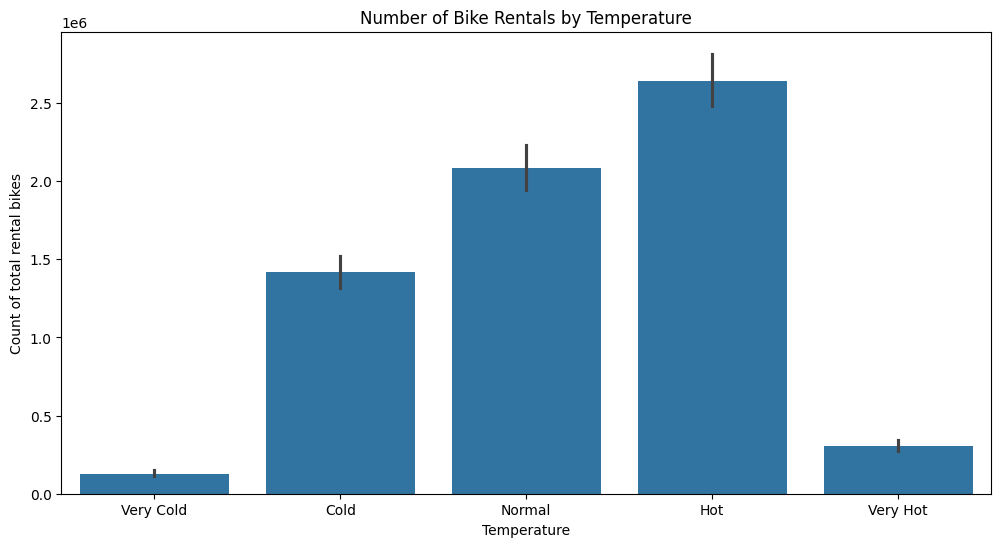

In [57]:
# Analisis pengaruh temp bin atemp bin hum bin dan windspeed bin terhadap jumlah penyewa sepeda
plt.figure(figsize=(12, 6))
sns.barplot(data=all_df, x="temp_bin", y="cnt", estimator=sum)
plt.title("Number of Bike Rentals by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count of total rental bikes")

In [58]:
# Mengurutkan best cnt berdasarkan temp_bin, atemp_bin, hum_bin, dan windspeed_bin
all_df.groupby(by=["temp_bin", "atemp_bin", "hum_bin", "windspeed_bin"], observed=True)["cnt"].sum().sort_values(ascending=False)

temp_bin   atemp_bin  hum_bin    windspeed_bin
Hot        Hot        High       Very Low         597088
                                 Low              444994
                      Normal     Low              424386
Normal     Normal     High       Very Low         388667
Hot        Hot        Normal     Very Low         379305
                                                   ...  
Cold       Cold       High       High                 21
Hot        Normal     Very High  Very High            16
Very Cold  Very Cold  Normal     Very High            15
Cold       Normal     Very Low   Normal                6
Very Cold  Very Cold  High       High                  2
Name: cnt, Length: 173, dtype: int64

In [59]:
# Segmentasi weathersit berdasarkan temp_bin, atemp_bin, hum_bin, dan winds.

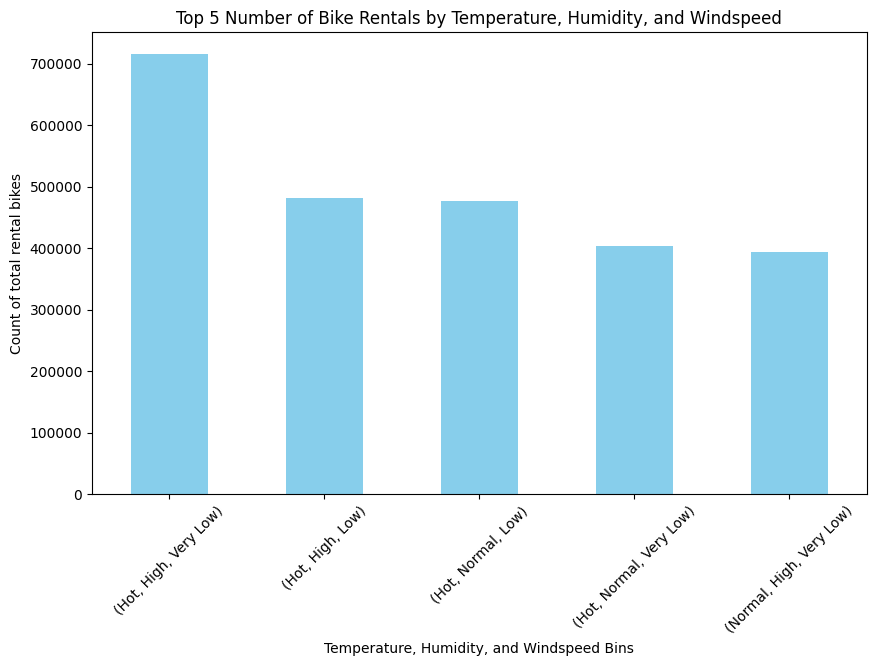

In [60]:
# Mengidentifikasi best cnt berdasarkan temp_bin, atemp_bin, hum_bin, dan windspeed_bin dengan menggunakan chart miring
top_5 = all_df.groupby(by=["temp_bin", "hum_bin", "windspeed_bin"], observed=True)["cnt"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.title("Top 5 Number of Bike Rentals by Temperature, Humidity, and Windspeed")
plt.xlabel("Temperature, Humidity, and Windspeed Bins")
plt.ylabel("Count of total rental bikes")
plt.xticks(rotation=45)
plt.show()


Jika diperhatikan, jumlah penyewa sepeda tertinggi terjadi pada kondisi cuaca panas, kelembaban tinggi, dan kecepatan angin sangat rendah. Hal ini terjadi karena cuaca panas membuat orang ingin bersepeda, kelembaban tinggi membuat orang merasa nyaman, dan kecepatan angin yang sangat rendah membuat orang tidak terganggu oleh angin.

In [61]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

### Conclution pertanyaan 1:
Jumlah penyewa sepeda meningkat di mulai pada bulan Maret hingga bulan Oktober. Hal tersebut terjadi karena bulan Maret adalah awal musim semi dan bulan Oktober adalah akhir musim panas sehingga cuaca yang cerah dan hangat membuat orang lebih banyak bersepeda. Jadi, kita dapat menambahkan jumlah sepeda pada bulan Maret hingga Oktober.
### Conclution pertanyaan 2:
Jumlah penyewa sepeda lebih banyak pada hari kerja dibandingkan dengan hari libur dan jumlah penyewa sepeda paling tinggi pada jam 8 pagi dan jam 5 sore. Hal ini terjadi karena sepeda dibutuhkan masyarakat untuk menuju tempat kerja dan banyak masyarakat yang pergi bekerja pada jam 8 pagi dan pulang dari tempat kerja jam 5 sore. Jadi, kita dapat menambahkan jumlah sepeda pada jam-jam tersebut.
### Conclution pertanyaan 3:
Jumlah penyewa sepeda paling tinggi pada musim summer dan fall. Hal ini mungkin terjadi karena masyarakat lebih nyaman menggunakan sepeda pada musim summer dan fall. Sehingga kita dapat menambahkan jumlah sepeda pada musim tersebut.
### Conclution pertanyaan 4:
Jumlah penyewa sepeda paling tinggi pada cuaca cerah/clear. Hal ini terjadi karena masyarakat ingin menikmati cuaca yang cerah dengan bersepeda. Sehingga kita dapat menambahkan jumlah sepeda pada cuaca cerah.
### Conclution pertanyaan 5:
Tidak ada korelasi yang signifikan antara suhu, kelembaban, kecepatan angin, dan jumlah penyewa sepeda. Suhu adalah faktor yang paling mempengaruhi jumlah penyewaan sepeda, tetapi pengaruhnya masih kecil.
Kelembaban dan kecepatan angin tidak memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda.Oleh karena itu, kita tidak perlu menambahkan jumlah sepeda berdasarkan suhu, kelembaban, dan kecepatan angin.